# Business Challenge
BoomBikes, a US bike-sharing company, is facing significant revenue losses due to the COVID-19 pandemic. To recover and thrive post-pandemic, they need to accurately predict bike sharing demand in the American market.

##Objective
* Develop a predictive model to identify key factors influencing bike sharing demand and quantify their impact. This model will enable BoomBikes to:

* Understand demand patterns and fluctuations.
Optimize bike distribution and pricing strategies.
Make informed business decisions for expansion and growth.
Data Availability
A dataset containing daily bike demand data across the US, along with various meteorological and lifestyle factors, is available for analysis.

Desired Outcome
A robust model that accurately forecasts bike sharing demand based on given variables, providing actionable insights to BoomBikes management.

Dataset characteristics
=========================================
day.csv have the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Step 1:
1. Importing necessary libraries : To begin our analysis, we will import a set of essential libraries for data manipulation, visualization, and statistical modeling. These libraries are fundamental for performing comprehensive data analysis and model building.


In [1]:
import numpy as np                    # For numerical operations
import pandas as pd                   # For data manipulation and analysis
import matplotlib.pyplot as plt       # For data visualization
import seaborn as sns                 # For statistical data visualization
import warnings                       # For managing warnings
warnings.filterwarnings('ignore')     # To ignore unnecessary warnings

from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler          # For feature scaling
import statsmodels.api as sm                            # For statistical modeling
from sklearn.feature_selection import RFE               # For recursive feature elimination
from sklearn.linear_model import LinearRegression       # For linear regression modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF
from sklearn.metrics import r2_score                    # For calculating the R-squared score
from sklearn.metrics import mean_squared_error          # For calculating mean squared error


2. Comprehending the Data Structure
Before diving into data analysis and modeling, it's crucial to understand the structure of the dataset. This includes examining the dimensions, data types, missing values, and basic statistical summary. Here's a step-by-step approach:

In [8]:
# Load the dataset
df = pd.read_csv('day (1).csv')

# Display the first few rows of the dataset
print(df.head())

# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Display the data types of each column
print("Data types:\n", df.dtypes)

# Check for missing values in the dataset
print("Missing values:\n", df.isnull().sum())

# Display basic statistical summary of the dataset
print("Statistical summary:\n", df.describe())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
Shape of the dataset: (730

### Observations

1. **Data Structure:**
   - The dataset contains 730 rows and 16 columns, representing daily data over approximately two years.

2. **Data Types:**
   - Most columns are integers (`int64`), indicating categorical or count data.
   - Continuous variables such as `temp`, `atemp`, `hum`, and `windspeed` are stored as float (`float64`).
   - The `dteday` column is an object (string) and will need conversion to a datetime type for better analysis.

3. **Missing Values:**
   - There are no missing values in the dataset.

4. **Categorical Variables:**
   - **Season**: Categories range from 1 to 4.
   - **Year (`yr`)**: Binary indicator (0 or 1), indicating data from two different years.
   - **Month (`mnth`)**: Ranges from 1 (January) to 12 (December).
   - **Holiday**: Binary indicator for holidays (0 or 1).
   - **Weekday**: Days of the week range from 0 (Sunday) to 6 (Saturday).
   - **Working day**: Binary indicator for working days (0 or 1).
   - **Weather situation (`weathersit`)**: Categories range from 1 to 3.

5. **Continuous Variables:**
   - **Temperature (`temp`)**: Ranges from approximately 2.42 to 35.33.
   - **Feels-like temperature (`atemp`)**: Ranges from approximately 3.95 to 42.04.
   - **Humidity (`hum`)**: Ranges from 0 to 97.25.
   - **Wind speed (`windspeed`)**: Ranges from approximately 1.50 to 34.00.

6. **Count Variables:**
   - **Casual**: Ranges from 2 to 3410.
   - **Registered**: Ranges from 20 to 6946.
   - **Total count (`cnt`)**: Ranges from 22 to 8714.

### Conclusion

The dataset appears well-structured, complete, and diverse in terms of weather conditions, dates, and rental counts. There are no missing values, and the data types are appropriate for further analysis. The next steps could include converting the `dteday` column to datetime format, creating dummy variables for categorical columns, and exploring correlations between features and the target variable (`cnt`).


### Visualisation of the data

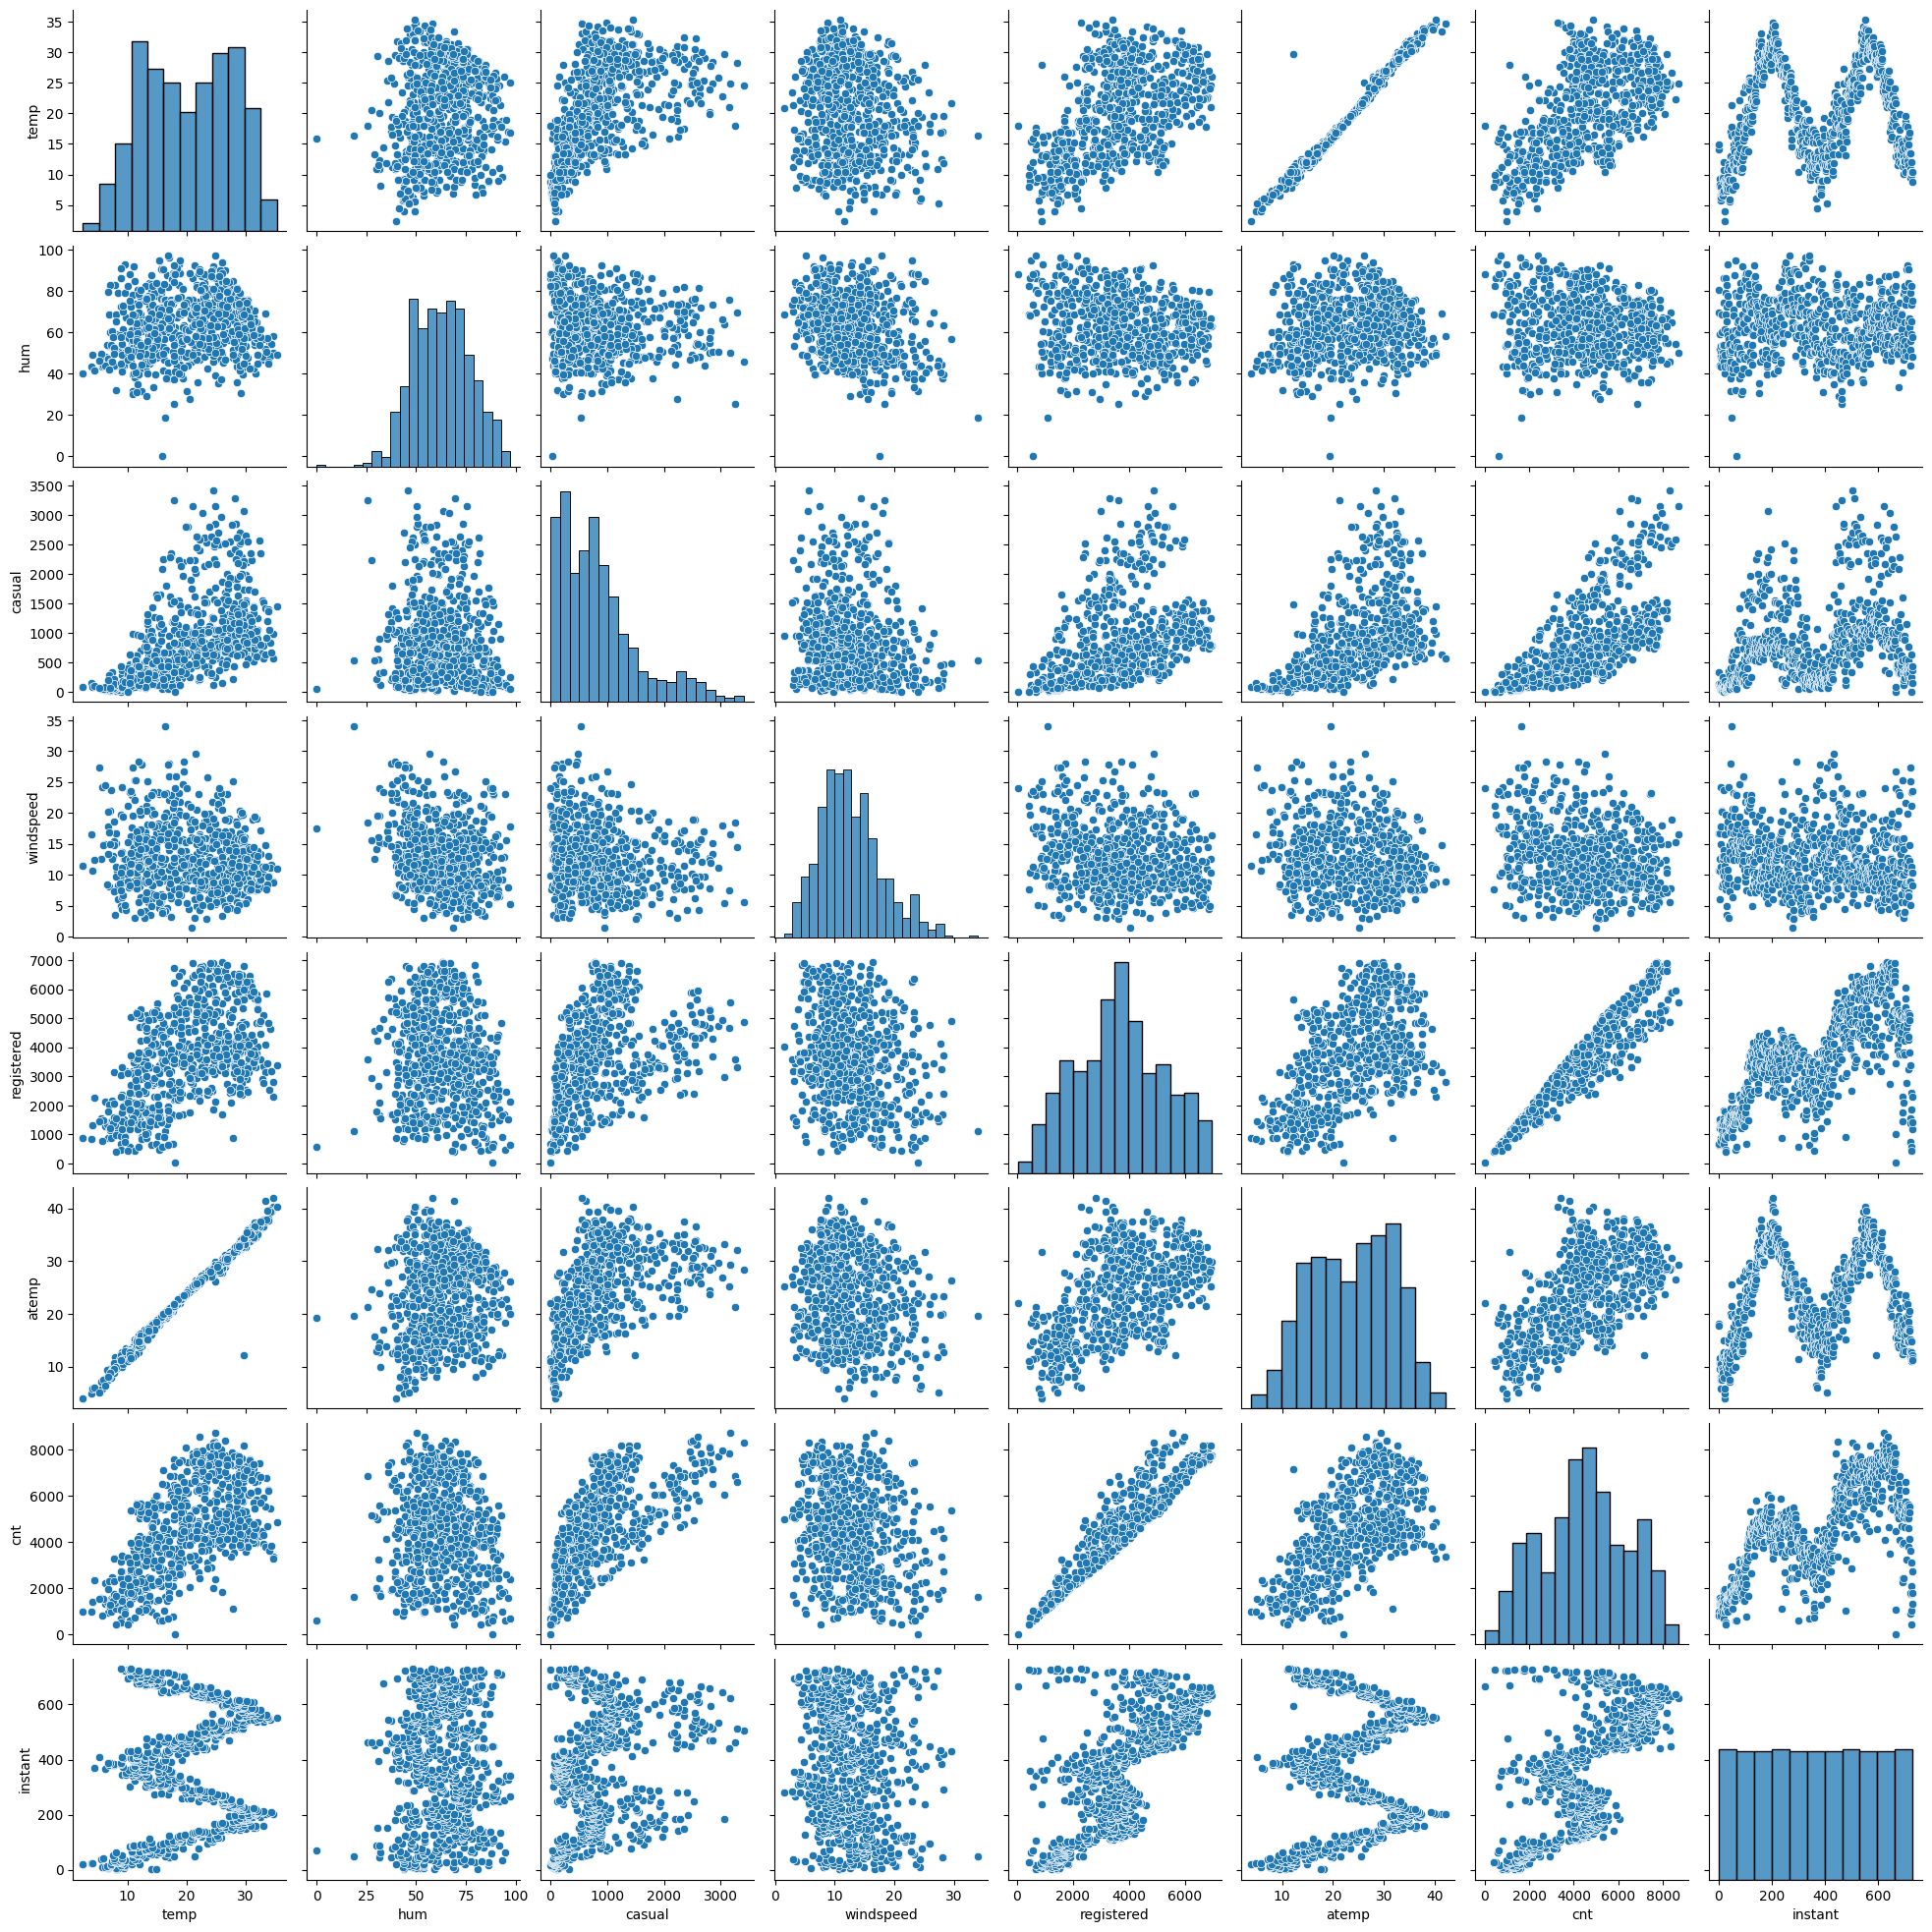

In [9]:
#visualizing the numeric variables of the dataset using pairplot
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

As we can see from the graph above, there is a strong correlation between the `count` variable and temperature. Additionally, humidity and windspeed show weaker correlations with `count`. We shall explore these correlations with different variables further.


In [10]:
# Drop any non-numeric columns if necessary
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
             instant        season            yr          mnth   holiday  \
instant     1.000000  4.135867e-01  8.660262e-01  4.982507e-01  0.016275   
season      0.413587  1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868   
yr          0.866026 -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195   
mnth        0.498251  8.310321e-01 -5.162656e-16  1.000000e+00  0.018905   
holiday     0.016275 -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday    -0.000023 -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday -0.004619  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weathersit -0.021862  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp        0.150738  3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp       0.152773  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
hum         0.016080  2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed  -0.112667 -2.296069e-01 -1.162435e-02 -2.080131e-01  0.0

### Observations from Correlation Matrix

1. **Date-Related Variables:**
   - **`instant`** (the index) has a strong positive correlation with **`yr`** (0.87) and a moderate correlation with **`mnth`** (0.50). This reflects a trend over time.
   - **`season`** shows a strong positive correlation with **`mnth`** (0.83), indicating that different seasons are associated with specific months.
   - **`holiday`** has minimal correlation with other variables, suggesting holidays have a limited impact on other features in the dataset.

2. **Weather-Related Variables:**
   - **`weathersit`** is positively correlated with **`hum`** (0.59), implying that higher humidity is associated with certain weather situations.
   - **`temp`** and **`atemp`** show a strong positive correlation (0.99), indicating that the "feels-like" temperature closely follows the actual temperature.
   - **`windspeed`** has a weak negative correlation with **`temp`** (-0.16) and **`atemp`** (-0.18), suggesting wind speed slightly affects temperature readings.

3. **Count Variables:**
   - **`casual`** and **`registered`** are strongly positively correlated with **`cnt`** (0.67 and 0.95, respectively), reflecting that both casual and registered counts contribute significantly to the total count.
   - **`casual`** and **`registered`** themselves have a moderate positive correlation (0.39), indicating that higher casual rentals are often associated with higher registered rentals.

4. **Correlation with Target Variable (`cnt`):**
   - **`cnt`** shows strong positive correlations with **`temp`** (0.63) and **`atemp`** (0.63), suggesting that higher temperatures are associated with more rentals.
   - **`cnt`** has a weak negative correlation with **`hum`** (-0.10) and **`windspeed`** (-0.24), indicating that higher humidity and wind speed slightly reduce the total rentals.

5. **Other Observations:**
   - **`workingday`** has a weak correlation with most variables, suggesting that working days have a minimal effect on other features.
   - **`weekday`** shows very low correlations with other variables, indicating that the day of the week has a negligible impact on rentals.

### Conclusion

The correlation matrix reveals several key relationships in the dataset:
- Temperature and "feels-like" temperature have strong correlations, affecting rental counts significantly.
- The count of casual and registered rentals strongly influences the total count, with temperature being a major factor in the number of rentals.
- Weather conditions and day-specific variables have weaker correlations, suggesting they might have a less pronounced impact on rental counts.


In [11]:
#mapping categorical variables with their subcategories to help with visualization analysis
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


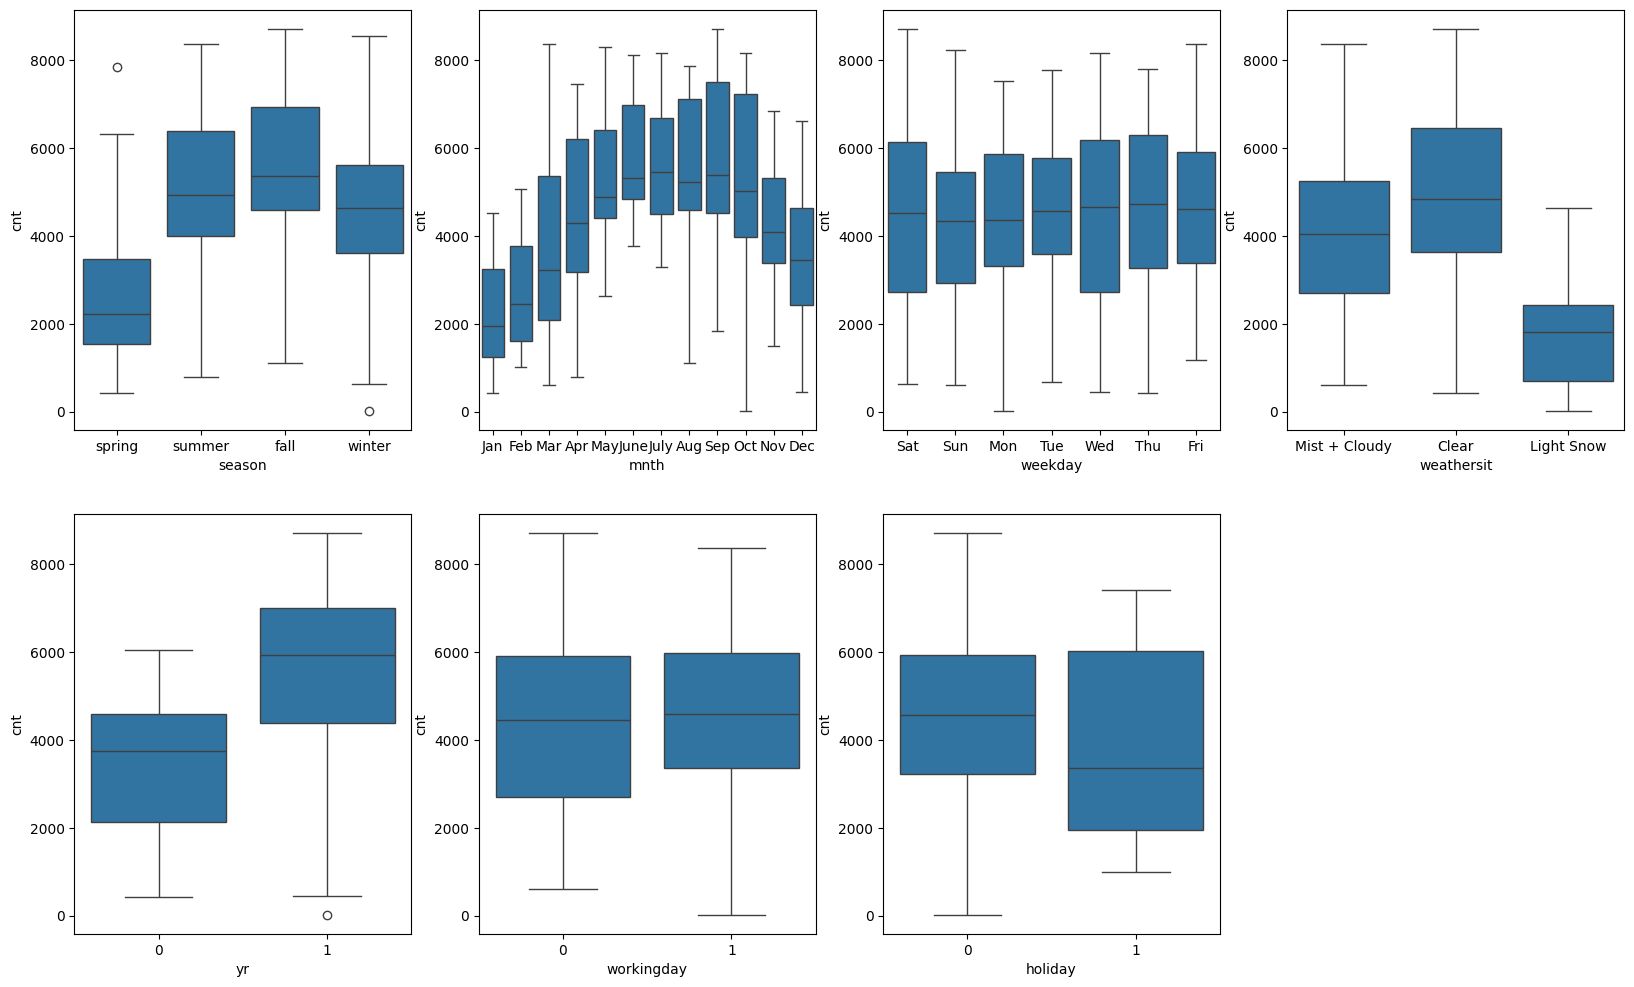

In [12]:
#visualizing the categorical variables of the dataset using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

##### Some of the observations from the plots above are as follows:

1. **Season:**
   - People are more likely to rent bikes in the summer and the fall season, as these seasons have higher mean counts compared to spring and winter.

2. **Month:**
   - Bike rental rates are highest in August and June. September and October also show relatively high counts.

3. **Weekday:**
   - Saturday shows the highest mean count, followed by Wednesday and Thursday, where more bikes are rented compared to other weekdays.

4. **Weather Situation:**
   - Most bike rentals take place in clear weather, as this category shows the highest mean count.

5. **Year:**
   - More bikes were rented in 2019 (Year 1) compared to 2018 (Year 0).

6. **Working Day:**
   - There is a slight increase in bike rentals on working days compared to non-working days, although the difference is not very large.

7. **Holiday:**
   - Bike rental rates are higher on non-holidays compared to holidays.


In [13]:
# List of categorical columns
categorical_columns = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'workingday', 'holiday']

# Initialize a dictionary to store the summary statistics
summary_stats = {}

# Calculate summary statistics for each categorical variable
for col in categorical_columns:
    summary_stats[col] = df.groupby(col)['cnt'].describe()

# Convert the dictionary to a DataFrame for easier viewing
summary_stats_df = pd.concat(summary_stats).reset_index()
summary_stats_df.columns = ['Category', 'Statistic', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Display the summary statistics
print(summary_stats_df)


      Category      Statistic  Count         Mean          Std     Min  \
0       season           fall  188.0  5644.303191  1459.800381  1115.0   
1       season         spring  180.0  2608.411111  1402.659942   431.0   
2       season         summer  184.0  4992.331522  1695.977235   795.0   
3       season         winter  178.0  4728.162921  1699.615261    22.0   
4         mnth            Apr   60.0  4484.900000  1776.160778   795.0   
5         mnth            Aug   62.0  5664.419355  1494.516146  1115.0   
6         mnth            Dec   62.0  3403.806452  1549.639353   441.0   
7         mnth            Feb   56.0  2669.964286  1150.264854  1005.0   
8         mnth            Jan   62.0  2176.338710  1161.674370   431.0   
9         mnth           July   62.0  5563.677419  1273.751871  3285.0   
10        mnth           June   60.0  5772.366667  1240.400031  3767.0   
11        mnth            Mar   62.0  3692.258065  1899.301812   605.0   
12        mnth            May   62.0  

Observations from the data:

1. **Season:**
   - Fall has the highest mean count (5644.30) with a significant standard deviation (1459.80), indicating variability.
   - Spring has the lowest mean count (2608.41) but has a relatively high standard deviation (1402.66).
   - Summer and Winter have mean counts of 4992.33 and 4728.16, respectively, with Winter showing slightly higher variability.

2. **Month:**
   - August has the highest mean count (5664.42) and relatively high variability.
   - January has the lowest mean count (2176.34) with a lower standard deviation compared to August.
   - Other months such as June and July also show high mean counts (5772.37 and 5563.68, respectively).

3. **Weekday:**
   - Saturday has the highest mean count (4550.54) with significant variability.
   - Monday has the lowest mean count (4338.12) with relatively lower variability.
   - Other weekdays like Friday and Sunday have mean counts close to each other (4690.29 and 4228.83).

4. **Weather Situation:**
   - Clear weather has the highest mean count (4876.79) with a standard deviation of 1879.48.
   - Light Snow has the lowest mean count (1803.29) but with the highest standard deviation among weather situations.
   - Mist + Cloudy shows a mean count of 4044.81, indicating moderate variability.

5. **Year:**
   - Year 1 has a significantly higher mean count (5610.25) compared to Year 0 (3405.76), with Year 1 also showing higher variability.

6. **Working Day:**
   - Working days (1) have a slightly higher mean count (4590.33) compared to non-working days (0) with a lower mean count (4330.17).

7. **Holiday:**
   - Non-holiday periods (0) have a higher mean count (4530.90) compared to holiday periods (1) with a mean count of 3735.00.


In [15]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
# Dropping unnecessary variables from the dataset
# The columns 'atemp', 'instant', 'dteday', 'casual', and 'registered' are removed as they are not needed for the analysis.
# 'atemp' is redundant since 'temp' is already included. 'dteday' and 'casual' are not required for the regression analysis.

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [17]:
# Creating dummy variables
# Generating dummy variables for the 'mnth', 'weekday', 'weathersit', and 'season' columns

month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)


In [18]:
# Adding the dummy variables to the original dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,True,False,False


In [19]:
# Dropping the original categorical variables
# Removing the 'season', 'mnth', 'weekday', and 'weathersit' columns as dummy variables have been created for them

df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
df.head(5)


,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,True,False,False,True,False,False


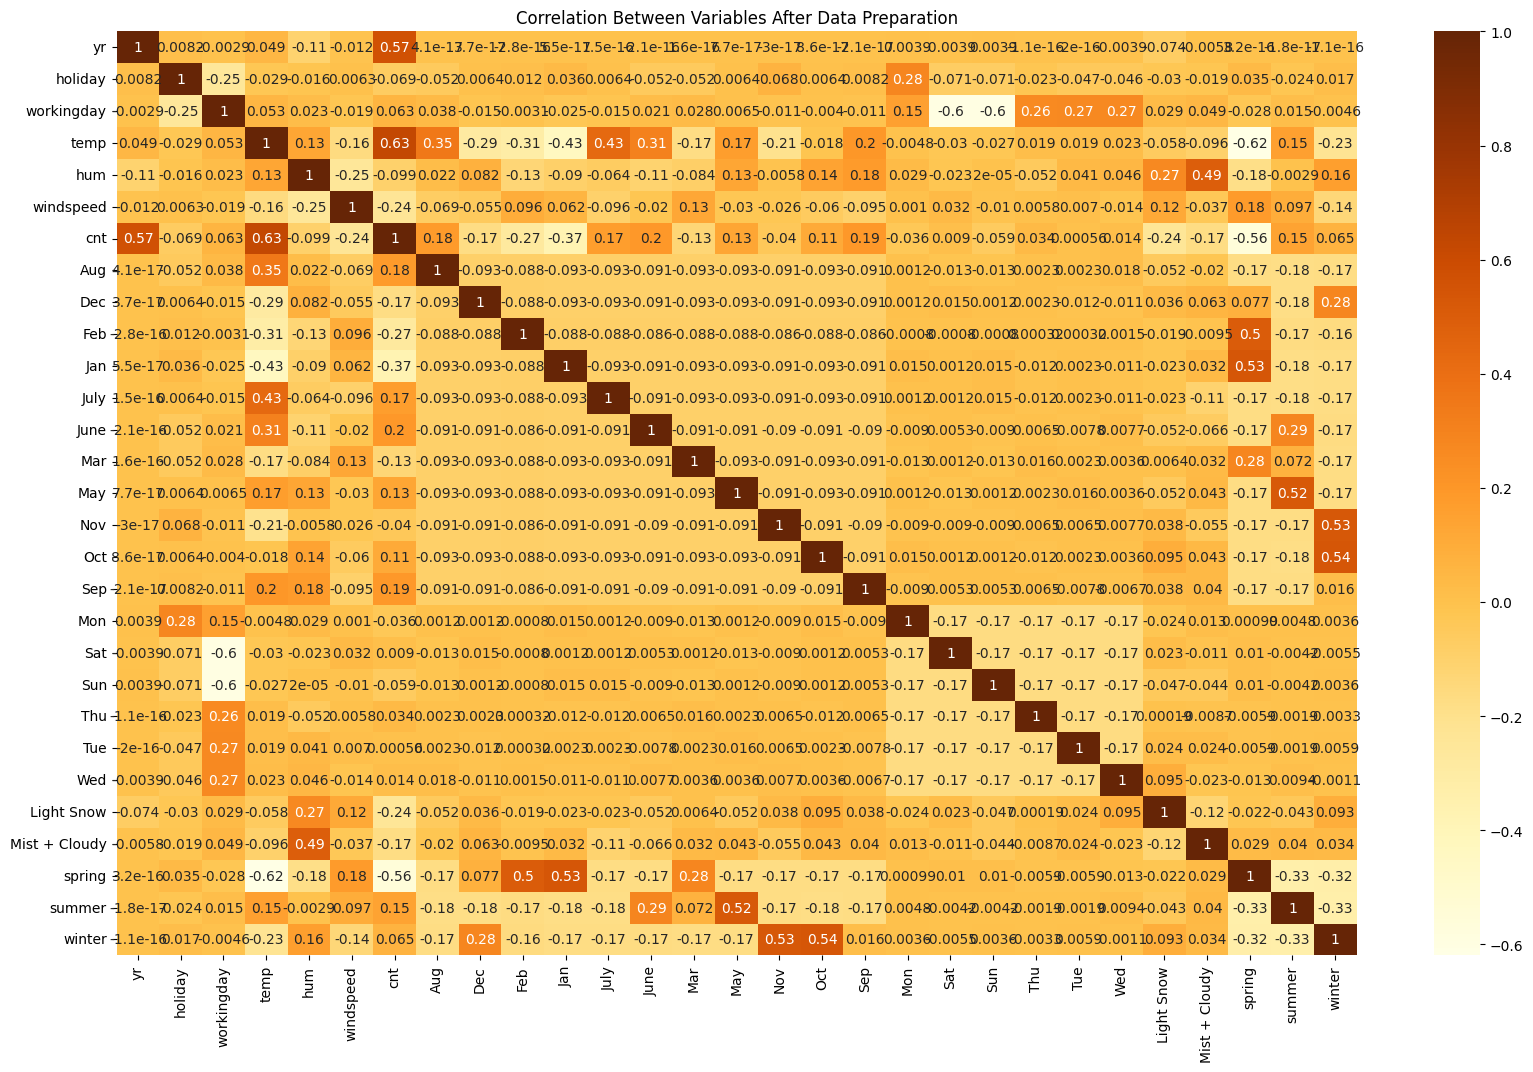

In [20]:
# Creating a heatmap to display the correlation between the new variables
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation Between Variables After Data Preparation')
plt.show()


## Step 2: Preparing the Data for Model Training

1. **Train-Test Split**: Splitting the dataset into training and testing sets to evaluate model performance.

2. **Rescaling**: Normalizing or standardizing the features to ensure they are on a similar scale, improving model performance and convergence.


In [80]:
# Splitting the Dataset into Training and Testing Sets

# Splitting the dataset into training and testing sets, with 70% of the data used for training and 30% for testing.
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)


In [145]:
# Checking the Shape of the Training and Testing Datasets

# Checking the shape of the training dataset
print(df_train.shape)

# Checking the shape of the testing dataset
print(df_test.shape)


(510, 28)
(220, 29)


### Scaling the Variables


In [82]:
# We need to rescale variables such as 'hum', 'temp', 'windspeed', and 'cnt' because they have larger values compared to other variables in the dataset.
# Normalize these variables using the scaler.fit_transform() method.

scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

# Checking the normalized values of the training set after scaling
df_train.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


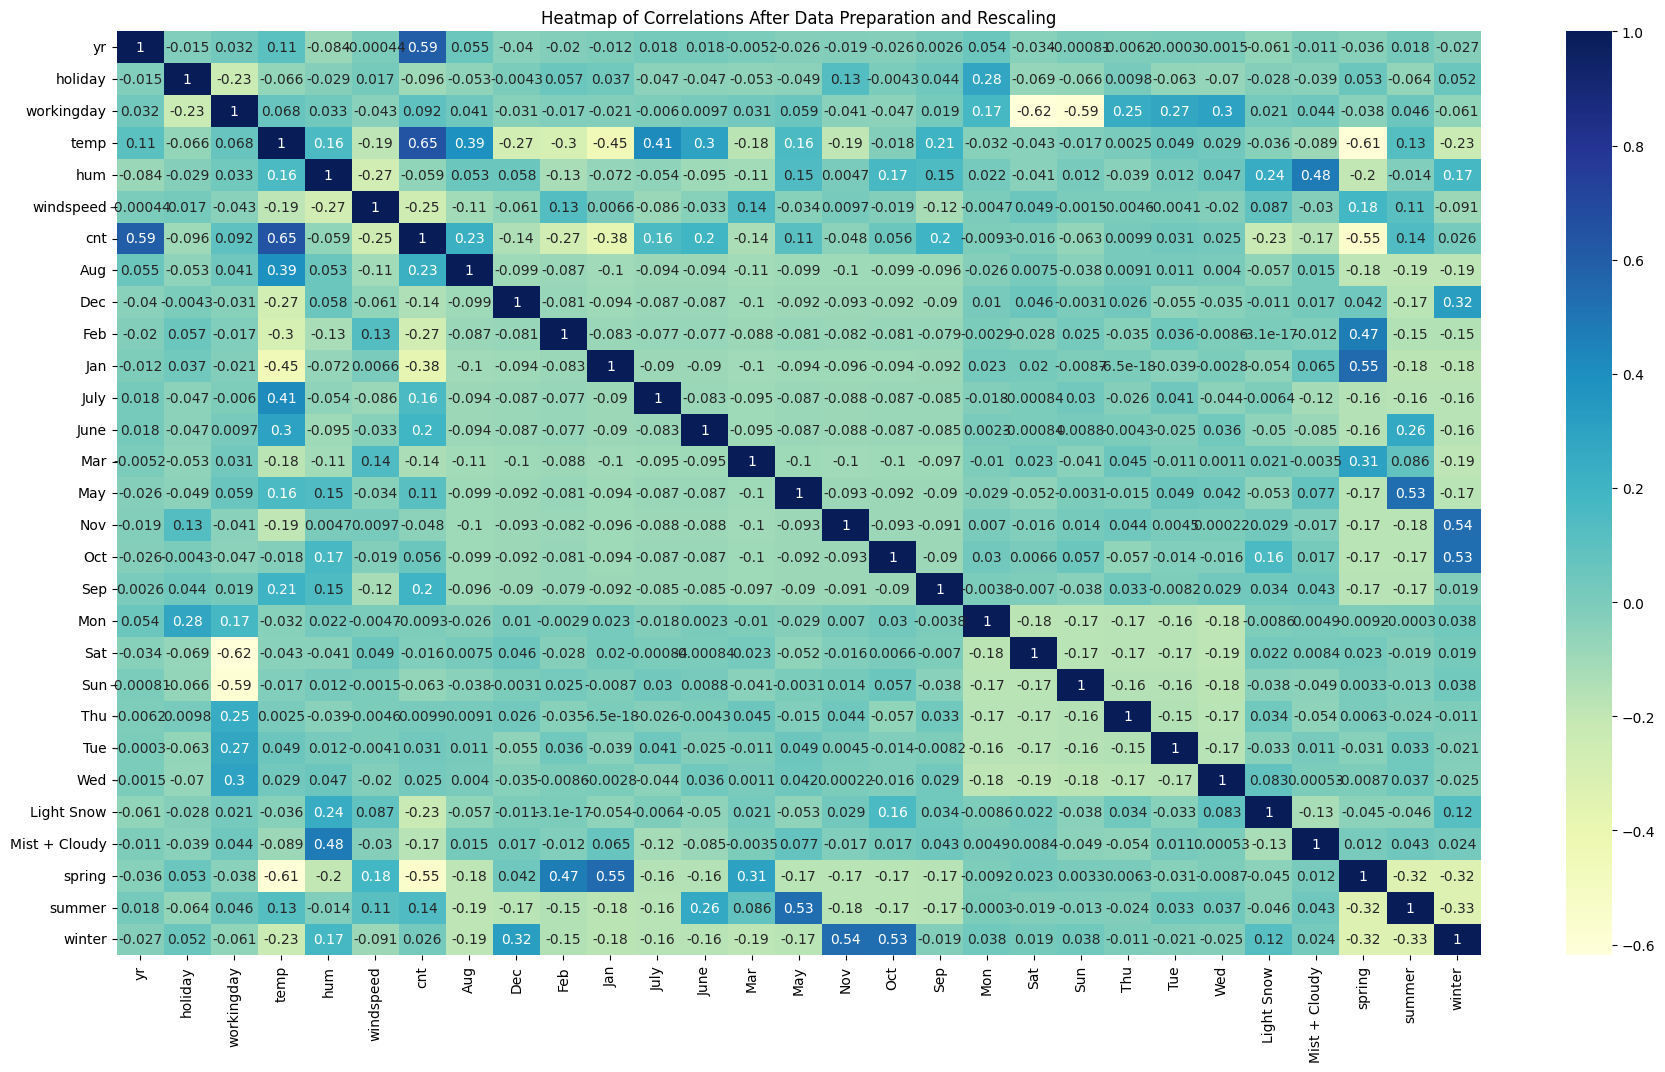

In [83]:
# Checking Correlation Coefficients

# Examining the correlation between variables to identify any strong correlations after data preparation and rescaling.

plt.figure(figsize=(22, 12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap of Correlations After Data Preparation and Rescaling')
plt.show()


#### As observed from the heatmap, the `count` variable appears to be strongly correlated with the `temp` variable. We will now explore the variance and relationships between these variables using pairplots.


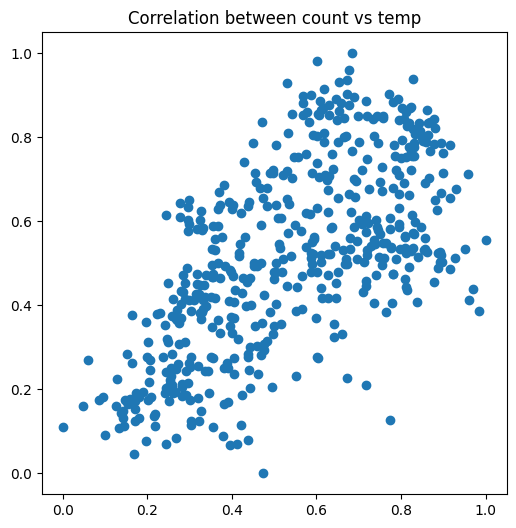

In [84]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

## Step 3: Training the model

### Univariate Linear Regression Model Building

In [85]:
import statsmodels.api as sm

# Preparing the variables for model building
y_train = df_train.pop('cnt')
X_train = df_train

# Checking the variables
print("y_train head:")
print(y_train.head(5))
print("\nX_train head:")
print(X_train.head(5))

# Adding a constant (intercept) for the model
X_train_sm = sm.add_constant(X_train['temp'])

# Creating the first model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Model parameters
print("\nModel Parameters:")
print(lr_model.params)

# Checking model summary
print("\nModel Summary:")
print(lr_model.summary())


y_train head:
576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

X_train head:
     yr  holiday  workingday      temp       hum  windspeed    Aug    Dec  \
576   1        0           1  0.815169  0.725633   0.264686  False  False   
426   1        0           0  0.442393  0.640189   0.255342  False  False   
728   1        0           0  0.245101  0.498067   0.663106  False   True   
482   1        0           0  0.395666  0.504508   0.188475  False  False   
111   0        0           1  0.345824  0.751824   0.380981  False  False   

       Feb    Jan  ...    Sat    Sun    Thu    Tue    Wed  Light Snow  \
576  False  False  ...  False  False  False   True  False       False   
426  False  False  ...   True  False  False  False  False       False   
728  False  False  ...  False   True  False  False  False       False   
482  False  False  ...   True  False  False  False  False       False   
111  False  False  ...  False  False 

The R-squared value is 0.416, which means that 41% of the variance in the count variable is explained by the temperature.


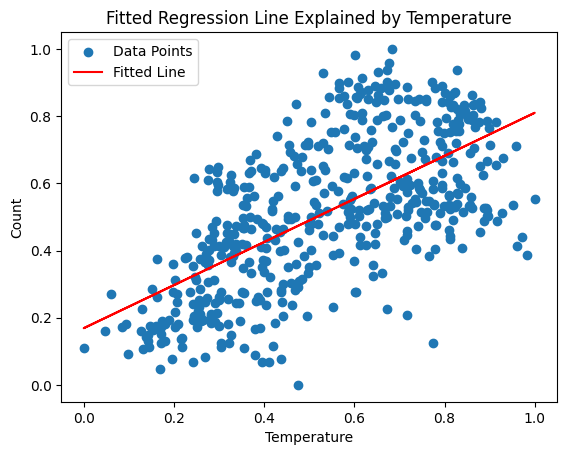

In [88]:
# Visualizing the data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train, label='Data Points')
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409 * X_train_sm.iloc[:, 1], 'r', label='Fitted Line')
plt.title('Fitted Regression Line Explained by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()


### Multivariate Linear Regression Model Building

### RFE

In [89]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15)

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

#checking the elements selected and the ones rejected in a list after rfe
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

#checking the values of true_rfe
print(true_rfe)

[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('Aug', False, 6), ('Dec', False, 3), ('Feb', False, 4), ('Jan', True, 1), ('July', True, 1), ('June', False, 13), ('Mar', False, 14), ('May', False, 5), ('Nov', False, 2), ('Oct', False, 12), ('Sep', True, 1), ('Mon', False, 8), ('Sat', True, 1), ('Sun', False, 7), ('Thu', False, 10), ('Tue', False, 9), ('Wed', False, 11), ('Light Snow', True, 1), ('Mist + Cloudy', True, 1), ('spring', True, 1), ('summer', True, 1), ('winter', True, 1)]
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')


In [90]:
# Create and fit the model with RFE-selected variables
X_train_sm = X_train.astype(float)
X_train_rfe = X_train_sm[true_rfe]
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()

# Parameters
print(lr_model.params)

# Model summary
print(lr_model.summary())


const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.22e-191
Time:                        10:06:19   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:   

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the constant for VIF calculation
X_train_rfe_no_const = X_train_rfe.drop(['const'], axis=1)

# Calculate VIF
vif = pd.DataFrame()
X = X_train_rfe_no_const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


         Features    VIF
4             hum  29.37
3            temp  17.78
2      workingday   5.31
5       windspeed   4.73
12         spring   4.53
14         winter   3.46
13         summer   2.85
11  Mist + Cloudy   2.29
0              yr   2.09
9             Sat   1.98
6             Jan   1.67
7            July   1.59
8             Sep   1.39
10     Light Snow   1.24
1         holiday   1.18


In [117]:
#hum variable can be dropped due to high vif
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.60e-188
Time:                        10:33:56   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520

In [118]:
#checking the VIF of the model

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_lr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features   VIF
3            temp  7.07
2      workingday  5.24
4       windspeed  4.68
11         spring  3.07
12         summer  2.34
0              yr  2.08
13         winter  1.98
8             Sat  1.97
5             Jan  1.62
6            July  1.59
10  Mist + Cloudy  1.58
7             Sep  1.35
1         holiday  1.17
9      Light Snow  1.09


In [120]:
#temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum','temp'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          6.44e-154
Time:                        10:36:54   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5444      0.020     27.118

## Heavy drop in perf.. so other vars are considered for dropping.

In [127]:
#temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum','workingday'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.48e-186
Time:                        10:42:38   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2120      0.030      6.978

In [128]:
#checking the VIF of the model

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_lr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features   VIF
2            temp  5.16
3       windspeed  4.64
10         spring  2.76
11         summer  2.24
0              yr  2.07
12         winter  1.80
4             Jan  1.61
5            July  1.59
9   Mist + Cloudy  1.56
6             Sep  1.34
7             Sat  1.19
8      Light Snow  1.08
1         holiday  1.05


In [129]:
#temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum','workingday','July'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          6.76e-186
Time:                        10:44:00   Log-Likelihood:                 498.95
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     497   BIC:                            -916.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2046      0.030      6.718

In [130]:
#checking the VIF of the model

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_lr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features   VIF
3       windspeed  4.63
2            temp  3.89
9          spring  2.64
0              yr  2.07
10         summer  1.91
11         winter  1.64
4             Jan  1.60
8   Mist + Cloudy  1.56
5             Sep  1.23
6             Sat  1.19
7      Light Snow  1.08
1         holiday  1.05


In [131]:
#temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum','workingday','July','Sat'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.96e-186
Time:                        10:45:01   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2080      0.030      6.829

In [132]:
#checking the VIF of the model

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_lr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features   VIF
3       windspeed  4.61
2            temp  3.85
8          spring  2.63
0              yr  2.07
9          summer  1.91
10         winter  1.63
4             Jan  1.60
7   Mist + Cloudy  1.56
5             Sep  1.23
6      Light Snow  1.08
1         holiday  1.04


In [133]:
#temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum','workingday','July','Sat','Jan'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.47e-186
Time:                        10:46:18   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

In [134]:
#checking the VIF of the model

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_lr1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

        Features   VIF
3      windspeed  4.60
2           temp  3.84
0             yr  2.07
7         spring  1.99
8         summer  1.90
9         winter  1.63
6  Mist + Cloudy  1.55
4            Sep  1.23
5     Light Snow  1.08
1        holiday  1.04


## Several points to be noted as we select this model as the final model:

1) The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2) The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

3) The VIF should be generally <5 and we have achieved that condition with all the variables.

4) The R-squared value achieved is 83.3% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

5) Dropping both VIF and temp lead to significant drop of performance so the next vars with high vif and p-val are dropped

## Step 4: Residual analysis

In [138]:
X_train_lr1 = sm.add_constant(X_train_lr1)
X_train_lr1

,const,yr,holiday,temp,windspeed,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1.0,0.0,0.815169,0.264686,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.255342,0.0,0.0,1.0,1.0,0.0,0.0
728,1.0,1.0,0.0,0.245101,0.663106,0.0,0.0,0.0,1.0,0.0,0.0
482,1.0,1.0,0.0,0.395666,0.188475,0.0,0.0,1.0,0.0,1.0,0.0
111,1.0,0.0,0.0,0.345824,0.380981,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.863973,0.187140,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.111379,0.0,0.0,0.0,1.0,0.0,0.0
350,1.0,0.0,0.0,0.248216,0.431816,0.0,0.0,1.0,0.0,0.0,1.0
79,1.0,0.0,0.0,0.462664,0.529881,0.0,0.0,1.0,0.0,1.0,0.0


In [139]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr1)

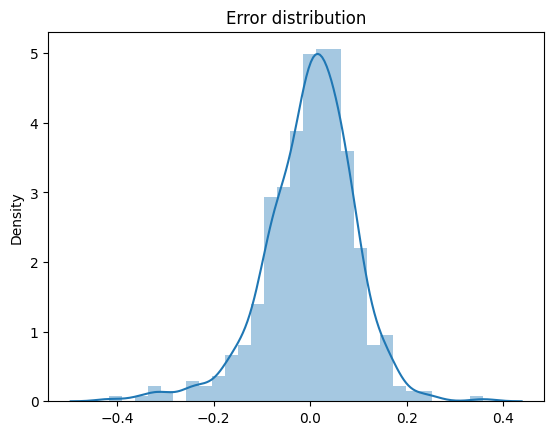

In [140]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [151]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.610133,0.153728,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.437098,0.339570,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
127,0,0,0,0.584649,0.650923,0.069510,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
640,1,0,1,0.745598,0.817947,0.052115,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
72,0,0,1,0.331557,0.512107,0.203418,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


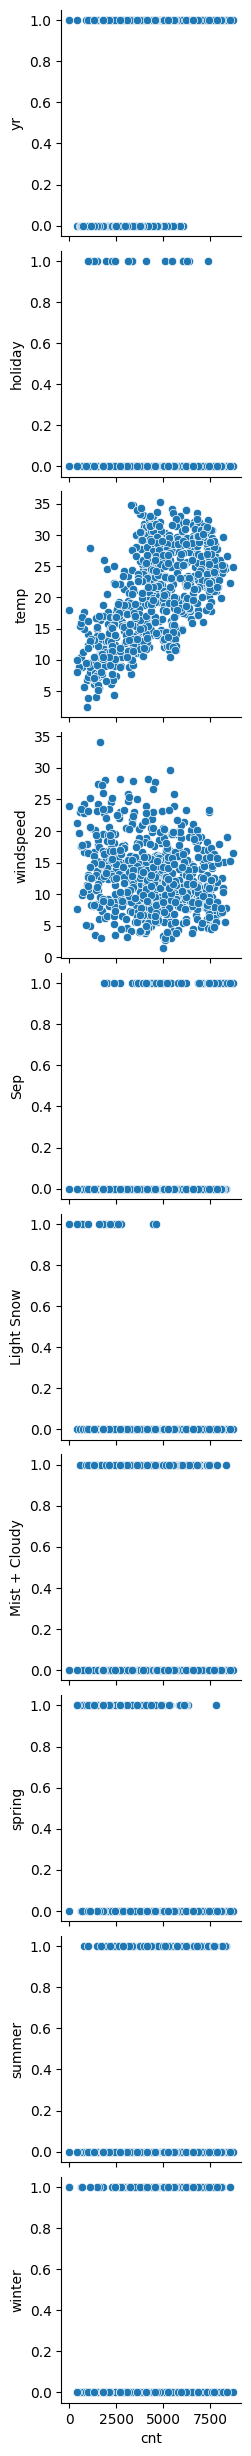

<Figure size 1600x1200 with 0 Axes>

In [152]:
y_test = df_test.pop('cnt')
X_test = df_test

X_train_lr1.columns
#dropping constant
X_train_lr1.drop(columns= 'const', inplace = True)
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr1.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)
#making predictions
y_pred = lr_model.predict(X_test_new)
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr1.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

##### We can now validate the assumptions of linear regression in the model:

As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

## Step 5: Prediction and evaluation of the test set

In [154]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8038195990728842


In [155]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8327073211549113


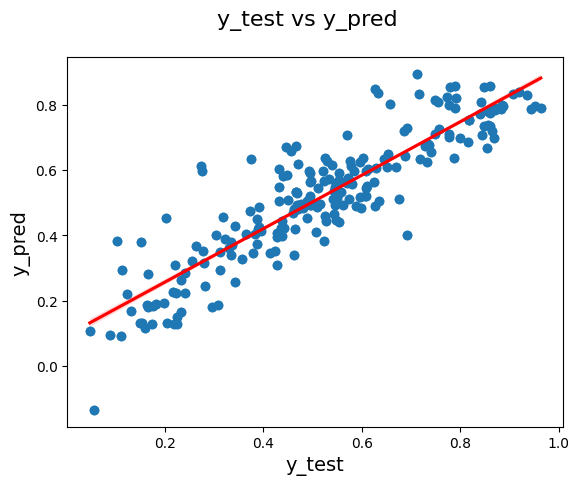

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_test and y_pred are converted to numerical types
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)
plt.show()


In [158]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.47e-186
Time:                        11:01:12   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447

###### Equation of the best fitted line is:
  cnt=0.1909+0.2341×yr−0.0963×holiday+0.4777×temp−0.1481×windspeed+0.0910×Sep−0.2850×Light Snow−0.0787×Mist + Cloudy−0.0554×spring+0.0621×summer+0.0945×winter

    

In [160]:
#finding out the mean squared error

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008409128123522073
Mean squared error of the test set is 0.009380224523815582


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Interpretation of the Regression Equation

**Equation:**

  cnt=0.1909+0.2341×yr−0.0963×holiday+0.4777×temp−0.1481×windspeed+0.0910×Sep−0.2850×Light Snow−0.0787×Mist + Cloudy−0.0554×spring+0.0621×summer+0.0945×winter


**Interpretations:**

- **Year (yr):**
  - **Coefficient:** 0.2341
  - **Interpretation:** For each additional year, the demand for shared bikes increases by approximately 0.2341 units. This suggests that bike demand may have a positive trend over the years, potentially indicating growing popularity or increased usage.

- **Holiday (holiday):**
  - **Coefficient:** -0.0963
  - **Interpretation:** On holidays, the demand for shared bikes decreases by approximately 0.0963 units. This negative impact could be due to people having other plans or not using bike-sharing services as frequently on holidays.

- **Temperature (temp):**
  - **Coefficient:** 0.4777
  - **Interpretation:** For each degree increase in temperature, the demand for shared bikes increases by approximately 0.4777 units. Warmer weather likely encourages more bike rides, making it a key factor in predicting bike-sharing demand.

- **Windspeed (windspeed):**
  - **Coefficient:** -0.1481
  - **Interpretation:** For each unit increase in windspeed, the demand for shared bikes decreases by approximately 0.1481 units. Higher wind speeds may deter people from biking, reducing the demand.

- **September (Sep):**
  - **Coefficient:** 0.0910
  - **Interpretation:** In September, the demand for shared bikes is higher by approximately 0.0910 units compared to other months. This could be related to seasonal trends or increased activities during this time.

- **Light Snow (Light Snow):**
  - **Coefficient:** -0.2850
  - **Interpretation:** When there is light snow, the demand for shared bikes decreases by approximately 0.2850 units. Snowy conditions likely make biking less attractive or feasible.

- **Mist + Cloudy (Mist + Cloudy):**
  - **Coefficient:** -0.0787
  - **Interpretation:** On misty or cloudy days, the demand for shared bikes decreases by approximately 0.0787 units. Poor visibility or gloomy weather can reduce bike usage.

- **Spring (spring):**
  - **Coefficient:** -0.0554
  - **Interpretation:** During spring, the demand for shared bikes is lower by approximately 0.0554 units compared to other times of the year. This may reflect seasonal variations in bike usage patterns.

- **Summer (summer):**
  - **Coefficient:** 0.0621
  - **Interpretation:** During summer, the demand for shared bikes is higher by approximately 0.0621 units. Warm weather typically boosts outdoor activities, including biking.

- **Winter (winter):**
  - **Coefficient:** 0.0945
  - **Interpretation:** During winter, the demand for shared bikes increases by approximately 0.0945 units. This could be due to specific seasonal promotions or unique patterns in bike usage during this period.

**Significance of Variables:**

- **Significant Variables:** Temperature, holiday, windspeed, light snow, mist/cloudy, spring, summer, and winter all significantly impact bike demand based on their p-values (all p-values are less than 0.05, indicating statistical significance).

- **Model Fit:** With an R-squared of 0.833, the model explains approximately 83.3% of the variability in bike demand. This suggests a strong fit, with the independent variables being good predictors of the demand for shared bikes.

**Business Implications:**

- **Seasonal Adjustments:** The model suggests seasonal and weather-related factors significantly influence bike demand. BoomBikes should consider these factors in their operational strategies, such as adjusting bike availability and pricing during different seasons and weather conditions.

- **Marketing and Promotions:** Target marketing efforts around periods with higher demand (e.g., warmer temperatures and summer) and consider promotional strategies to counteract reduced demand during adverse weather conditions.

- **Operational Planning:** Preparing for increased demand in specific months or weather conditions will help BoomBikes optimize their resources and ensure they can meet customer needs effectively.
